In [ ]:
# Import Required Packages

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/wbslivera/adult_income/main/adult_2.csv'
data = read_csv(url)
dataset = data.values

In [ ]:
# x input features and y output
X = dataset[:, :-1]
y = dataset[:,-1]

In [ ]:
# format all fields as string
X = X.astype(str)
# reshape target to be a 2d array
y = y.reshape((len(y), 1))

In [ ]:
# Split train and test data sets, 66% train and 33% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (30298, 14) (30298, 1)
Test (14924, 14) (14924, 1)


In [ ]:
def prepare_inputs(X_train, X_test):
 oe = OneHotEncoder(handle_unknown = "ignore")
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc

In [ ]:
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = Sequential([
  Dense(8, activation='relu', input_shape = [X_train_enc.shape[1]]),
  Dense(4, activation='relu'),  
  Dense(2, activation='softmax')                     
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 166272    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 166,318
Trainable params: 166,318
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train_enc, y_train_enc, batch_size=500, epochs=100, validation_data=(X_test_enc, y_test_enc))

Epoch 1/100
61/61 [==============================] - 1s 8ms/step - loss: 0.5835 - accuracy: 0.7535 - val_loss: 0.4152 - val_accuracy: 0.7497
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.7549 - val_loss: 0.3769 - val_accuracy: 0.7693
Epoch 3/100
61/61 [==============================] - 0s 6ms/step - loss: 0.3563 - accuracy: 0.8269 - val_loss: 0.3525 - val_accuracy: 0.8518
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.8732 - val_loss: 0.3229 - val_accuracy: 0.8592
Epoch 5/100
61/61 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.8920 - val_loss: 0.3079 - val_accuracy: 0.8614
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.9062 - val_loss: 0.3038 - val_accuracy: 0.8606
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: 0.2104 - accuracy: 0.9217 - val_loss: 0.3008 - val_accuracy: 0.8628
Epoch 8/100
6

In [ ]:
test_loss, test_acc = model.evaluate(X_test_enc, y_test_enc, verbose=2)

467/467 - 0s - loss: 0.6750 - accuracy: 0.8264


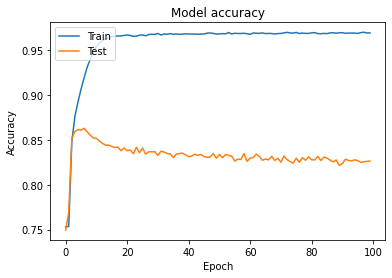

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

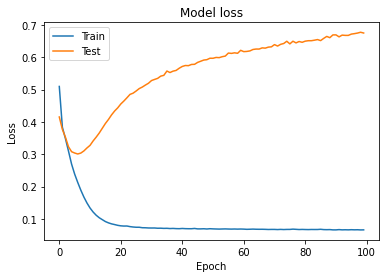

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()